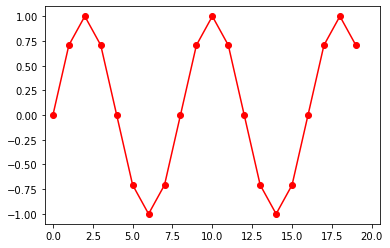

In [2]:
import numpy as np
from matplotlib import pyplot as plt
s = np.sin(2*np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

In [3]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0]-2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [5]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [6]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


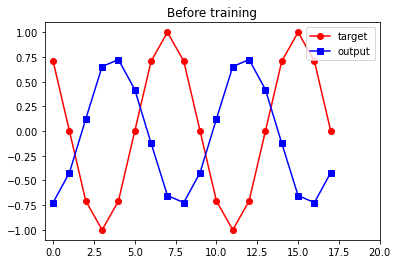

In [7]:
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20, 5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title('Before training')
plt.show()

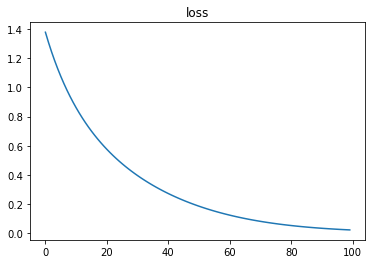

In [8]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

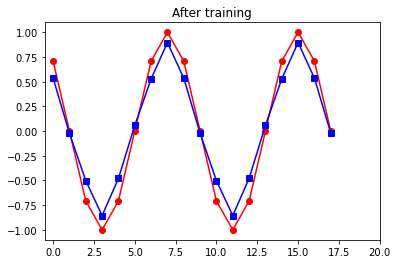

In [12]:
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20, 5)
plt.ylim(-1.1, 1.1)
plt.title('After training')
plt.show()

## GRU, LSTM model implementation
- compare with the RNN model

In [13]:
# GRU, LSTM model generation
from keras.models import Sequential
from keras.layers import LSTM, Dense

np.random.seed(0)
model = Sequential()
model.add(LSTM(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


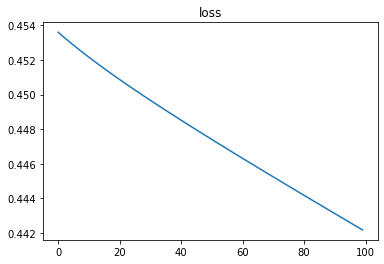

In [15]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

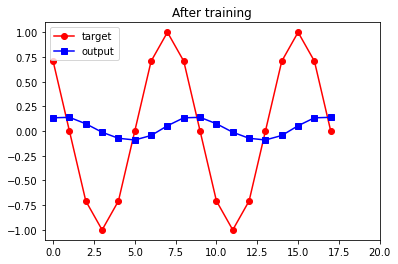

In [19]:
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20, 5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

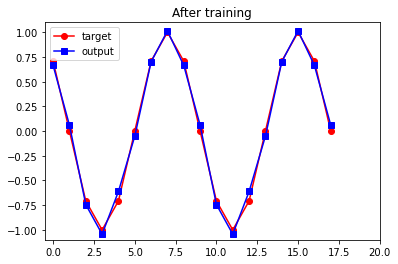

In [21]:
history = model.fit(X_train, Y_train, epochs=2000, verbose=0)
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20, 5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [28]:
from keras.models import Sequential
from keras.layers import GRU, Dense

np.random.seed(0)
model = Sequential()
model.add(GRU(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10)                360       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


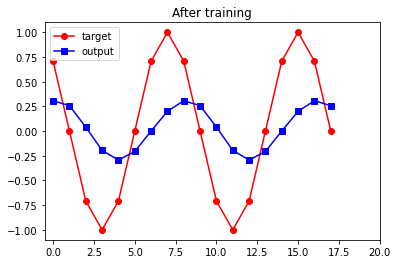

In [29]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)
plt.plot(Y_train, 'ro-', label='target')
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label='output')
plt.xlim(-0.5, 20, 5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

## Imply RNN model on Keras Router dataset
- Use 'reuter' dataset, text data provided from keras
- Construct Classifier with the RNN structure models
- It needs preprocessing like 'pad_sequence'.
- Exercise EarlyStopping for stopping overfitting

In [37]:
from tensorflow.keras.datasets import reuters

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
print('Train data : {}'.format(len(X_train)))
print('test data : {}'.format(len(X_test)))
num_classes = max(Y_train) + 1
print('class : {}'.format(num_classes))

Train data : 8982
test data : 2246
class : 46


In [38]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 1s 2us/step


In [41]:
index_word = {}
for key, value in word_index.items():
    index_word[value] = key

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [43]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))
es = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(X_train, Y_train, batch_size=120, epochs=10, callbacks=[es, mc], validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 14s 2ms/sample - loss: 2.6535 - acc: 0.3460 - val_loss: 2.3950 - val_acc: 0.3450
Epoch 2/10
7185/7185 [==============================] - 11s 2ms/sample - loss: 2.2056 - acc: 0.4345 - val_loss: 2.0493 - val_acc: 0.4808
Epoch 3/10
7185/7185 [==============================] - 11s 1ms/sample - loss: 2.0135 - acc: 0.4953 - val_loss: 1.9805 - val_acc: 0.4908
Epoch 4/10
7185/7185 [==============================] - 11s 1ms/sample - loss: 1.9372 - acc: 0.5044 - val_loss: 1.8882 - val_acc: 0.5092
Epoch 5/10
7185/7185 [==============================] - 11s 1ms/sample - loss: 1.8001 - acc: 0.5408 - val_loss: 1.7638 - val_acc: 0.5476
Epoch 6/10
7185/7185 [==============================] - 11s 2ms/sample - loss: 1.6890 - acc: 0.5673 - val_loss: 1.6725 - val_acc: 0.5671
Epoch 7/10
7185/7185 [==============================] - 11s 2ms/sample - loss: 1.5941 - acc: 0.6019 - val_loss: 1.6392 - val_acc: 

In [45]:
loaded = load_model('best_model.h5')
print("\n 테스트정확도 : %.4f" % (loaded.evaluate(X_test, Y_test)[1]))

2246/2246 [==============================] - 1s 632us/sample - loss: 1.4901 - acc: 0.6282

 테스트정확도 : 0.6282


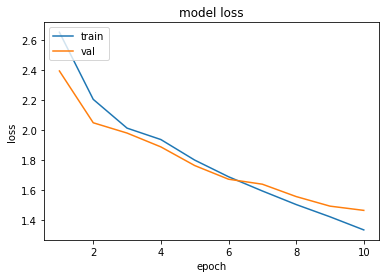

In [46]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc= 'upper left')
plt.show()